## Decomposition Exercise

In [21]:
# import pandas
import pandas as pd

# import statsmodels.api as sm
import statsmodels.api as sm

# import matplotlib
import matplotlib.pyplot as plt

import numpy as np

In [2]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

* print the top 5 rows

In [5]:
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


* Resample the time series using monthly averages and store the new time series as a Series `y`.

In [31]:
df = pd.DataFrame(co2).reindex()
df.index = pd.to_datetime(df.index)
y = df.groupby(df.index.month).mean()
y.shape

(12, 1)

In [32]:
y2 = df.resample('M').mean()
y2.shape

(526, 1)

* print the top 5 rows of 'y'

In [15]:
y.head()

,co2
1,339.779787
2,341.091617
3,341.638587
4,342.092308
5,343.132086


* check for missing values

In [19]:
y.isna().sum()

co2    0
dtype: int64

In [33]:
y2.isna().sum()

co2    5
dtype: int64

* replace missing values with last available value


    - Example: If Feb 2010 is missing, use the value from Jan 2010.

In [34]:
y2 = y2.fillna(method = 'ffill')

In [36]:
y2.isna().sum()

co2    0
dtype: int64

* plot the time series `y`

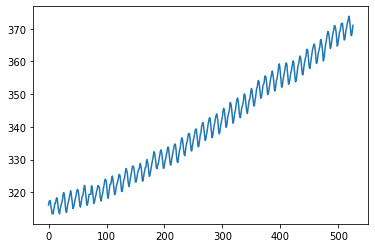

In [41]:
x = np.arange(y2.shape[0])
plt.plot(x,y2)

* Apply and plot the following:


    1. additive seasonal decomposition
    2. multiplicative seasonal decomposition

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose


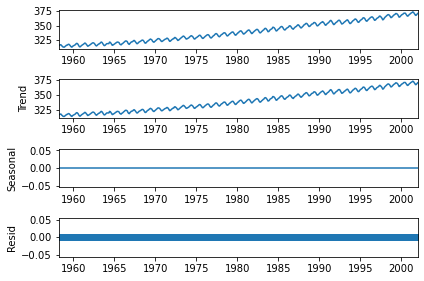

In [38]:
result = seasonal_decompose(y2, model='additive', period=1)
result.plot()
plt.show()

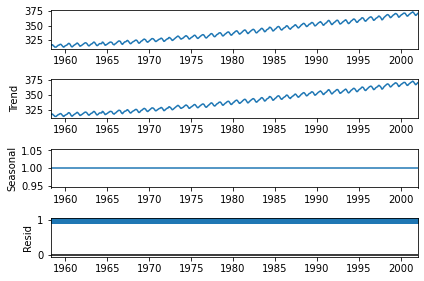

In [37]:
result = seasonal_decompose(y2, model='multiplicative', period=1)
result.plot()
plt.show()